In [1]:
from simulation import Simulation
from lineages import Lineage
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import copy
import numpy as np
from tqdm import tqdm

simulations = []
for x in range(80):
    sim = Simulation(dt=1/120, Delta=np.random.uniform(8, 12), D_sd=2, tau=np.random.uniform(18, 22), t_sd=3) # 2fps, averge doubling time 20 mins, adder at 10
    sim.run(length=200, vm=np.random.uniform(5, 25)) # initialise mother cell with various lengths
    simulations.append(sim)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24000/24000 [00:01<00:00, 15950.83it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24000/24000 [00:01<00:00, 17699.17it/s]


In [4]:
lineages = Lineage(simulations, cell=-1)

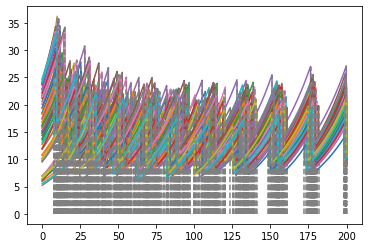

In [5]:
lineages.plot()

In [14]:
div_times, div_lengths = lineages.collect_downsampled_data(n=480) # 4 mins time step

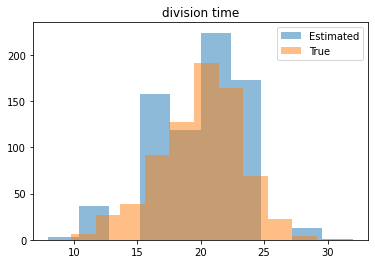

In [15]:
import matplotlib.pyplot as plt

true_div_times = [l[j+1] - l[j] for l in lineages.divisions_t for j in range(len(l) - 1)]
est_div_times = [item for sublist in div_times for item in sublist]
plt.hist(np.array(est_div_times), alpha=0.5, label="Estimated")
plt.hist(np.array(true_div_times), alpha=0.5, label="True")
plt.legend()
plt.title("division time")
plt.show()

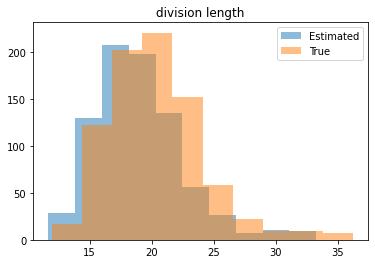

In [17]:
true_div_lengths = [lineages.lineages[l][j] for l in range(len(lineages.divisions_idx)) for j in lineages.divisions_idx[l]]
est_div_lengths = [item for sublist in div_lengths for item in sublist]
plt.hist(np.array(est_div_lengths), alpha=0.5, label="Estimated")
plt.hist(np.array(true_div_lengths), alpha=0.5, label="True")
plt.legend()
plt.title("division length")
plt.show()